In [1]:
import pandas as pd
import xarray as xr
import cartopy 
import cartopy.crs as ccrs
import numpy as np 
from matplotlib import pyplot as plt 
import math
%matplotlib inline

In [2]:
trace_data = xr.open_dataset('GEOTRACES_IDP2017_v2_Discrete_Sample_Data.nc')
#trace_data


In [3]:
# select and rename lat and lon variables from original dataset 
lat = trace_data.latitude
print(lat)

lon = trace_data.longitude
print(lon)

# selecting and renaming the CTD salinity data from the dataset
sal = trace_data.var8
print(sal)

# selecting and renaming dissolved Ba in seawater from the orginal dataset 
ba = trace_data.var69
print(ba)

## HOW DO I GET THE LAT AND LON COORDINATES 

<xarray.DataArray 'latitude' (N_STATIONS: 1866)>
array([ 38.4329,  40.3332,  40.3331, ...,  49.566 ,  48.65  , -38.9647],
      dtype=float32)
Dimensions without coordinates: N_STATIONS
Attributes:
    long_name:       Latitude
    units:           degrees_north
    C_format:        %.3f
    FORTRAN_format:  F12.3
<xarray.DataArray 'longitude' (N_STATIONS: 1866)>
array([349.3   , 349.9641, 350.5405, ..., 221.333 , 233.333 , 179.403 ],
      dtype=float32)
Dimensions without coordinates: N_STATIONS
Attributes:
    long_name:       Longitude
    units:           degrees_east
    C_format:        %.3f
    FORTRAN_format:  F12.3
    valid_min:       0.0
    valid_max:       360.0
<xarray.DataArray 'var8' (N_STATIONS: 1866, N_SAMPLES: 698)>
[1302468 values with dtype=float32]
Dimensions without coordinates: N_STATIONS, N_SAMPLES
Attributes:
    long_name:       CTDSAL
    comment:         Practical salinity from CTD sensor on the PSS-1978 scale
    C_format:        %.3f
    FORTRAN_format: 

In [4]:
sal_ba = xr.Dataset(data_vars={'salinity':    (('N_STATIONS', 'N_SAMPLES'), sal),
                   'barium': (('N_STATIONS', 'N_SAMPLES'), ba), 'latitude': ('N_STATIONS', lat), 'longitude': ('N_STATIONS', lon)},
                    coords={'N_STATIONS': trace_data.N_STATIONS,
                            'N_SAMPLES': trace_data.N_SAMPLES})
sal_ba

<xarray.Dataset>
Dimensions:     (N_SAMPLES: 698, N_STATIONS: 1866)
Coordinates:
  * N_STATIONS  (N_STATIONS) int64 0 1 2 3 4 5 ... 1860 1861 1862 1863 1864 1865
  * N_SAMPLES   (N_SAMPLES) int64 0 1 2 3 4 5 6 ... 691 692 693 694 695 696 697
Data variables:
    salinity    (N_STATIONS, N_SAMPLES) float32 34.951 34.951 34.951 ... nan nan
    barium      (N_STATIONS, N_SAMPLES) float32 nan nan nan nan ... nan nan nan
    latitude    (N_STATIONS) float32 38.4329 40.3332 40.3331 ... 48.65 -38.9647
    longitude   (N_STATIONS) float32 349.3 349.9641 350.5405 ... 233.333 179.403

In [5]:
meandata = sal_ba.mean('N_SAMPLES')
meandata

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:     (N_STATIONS: 1866)
Coordinates:
  * N_STATIONS  (N_STATIONS) int64 0 1 2 3 4 5 ... 1860 1861 1862 1863 1864 1865
Data variables:
    salinity    (N_STATIONS) float32 34.951 35.505802 35.548206 ... nan nan nan
    barium      (N_STATIONS) float32 nan nan nan nan nan ... nan nan nan nan nan
    latitude    (N_STATIONS) float32 38.4329 40.3332 40.3331 ... 48.65 -38.9647
    longitude   (N_STATIONS) float32 349.3 349.9641 350.5405 ... 233.333 179.403

In [6]:
pdmean = meandata.to_dataframe()
pdmean

,salinity,barium,latitude,longitude
N_STATIONS,,,,
0,34.951000,NaN,38.432899,349.299988
1,35.505802,NaN,40.333199,349.964111
2,35.548206,NaN,40.333099,350.540497
3,35.543293,NaN,40.332901,350.356812
4,35.726898,NaN,40.333302,350.233398
5,35.836624,NaN,40.333000,350.198090
6,35.716583,NaN,40.333099,350.123810
7,35.549625,NaN,40.333000,350.055908
8,35.538624,NaN,40.333000,349.964203


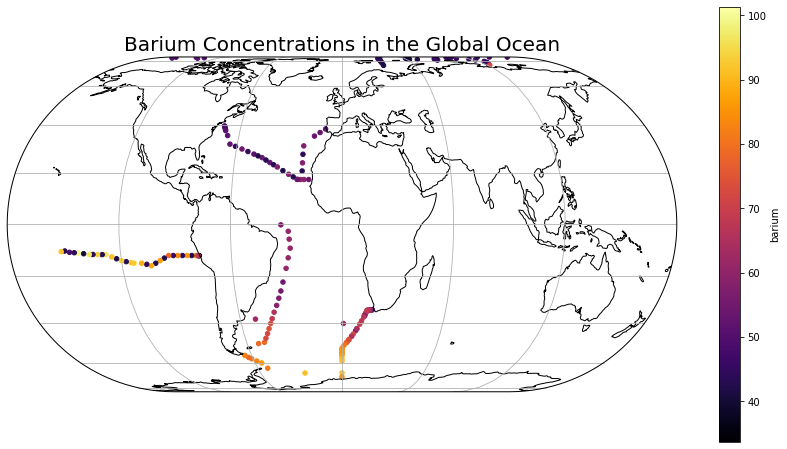

In [7]:
fig = plt.figure(figsize=(15,8))
#fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax = plt.axes(projection=ccrs.EckertIV())
ax.coastlines()
ax.gridlines()
ax.set_title('Barium Concentrations in the Global Ocean', size = 20)
pdmean.plot.scatter('longitude','latitude', c = 'barium', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno')

## find a way to re-label the colorbar

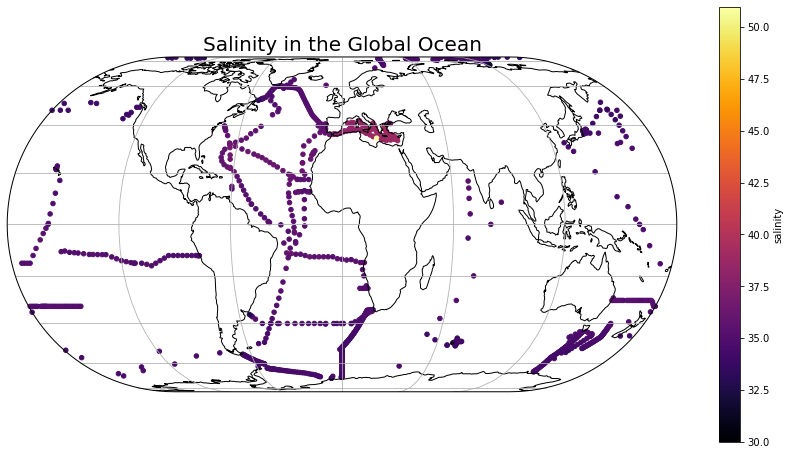

In [8]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.EckertIV())
ax.coastlines()
ax.gridlines()
ax.set_title('Salinity in the Global Ocean', size = 20)
pdmean.plot.scatter('longitude','latitude', c = 'salinity', ax=ax, transform=ccrs.PlateCarree(), colormap = 'inferno', vmin = 30)

In [9]:
# how to do an interpolation?
    
#then calculate the correlation between salinity and Ba (make sure it's over lat/lon tho)
    #plot correlation in cartopy 

#convert KML file to CSV 
    # use this to impose IODP drill holes onto cartopy plots 
    # consider making a threshold value for where not to take cores for Ba studies 
        # plot this?